In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

from openpiv import process, tools
import pkg_resources as pkg
# import os


# if im1 is None and im2 is None:
im1 = pkg.resource_filename('openpiv','examples/test5/frame_a.tif')
im2 = pkg.resource_filename('openpiv','examples/test5/frame_b.tif')


frame_a = imageio.imread(im1)
frame_b = imageio.imread(im2)

frame_a[0:32,512-32:] = 255 # white corner to identify the orientation

imageio.imsave('1.tif',frame_a)
imageio.imsave('2.tif',frame_b)

u, v = process.extended_search_area_piv(frame_a.astype(np.int32),frame_b.astype(np.int32),window_size=32,overlap=16)
x, y = process.get_coordinates( image_size=frame_a.shape, 
                           window_size=32, overlap=16)

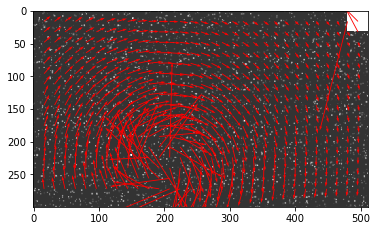

In [2]:
fig,ax = plt.subplots(figsize=(6,6))
ax.imshow(frame_a,cmap=plt.get_cmap('gray'),alpha=0.8)
ax.quiver(x,np.flipud(y),u,v,scale=50,color='r')
# or np.flipud(y)
# plt.gca().invert_yaxis()
# plt.show()

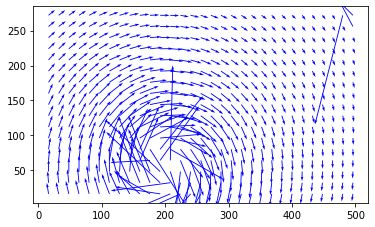

In [3]:
fig,ax = plt.subplots(figsize=(6,6))
# plt.imshow(frame_a,cmap=plt.get_cmap('gray'),alpha=0.8,origin='upper')
ax.quiver(x,y,u,v,scale=50,color='b')
ax.set_aspect(1.1)
# plt.gca().invert_yaxis()
plt.show()

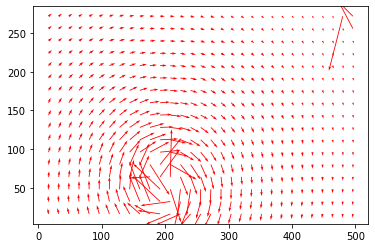

In [4]:
tools.save(x, y, u, v, np.ones_like(u), 'tmp.txt' )
tools.display_vector_field('tmp.txt', scale=100, width=0.0025)

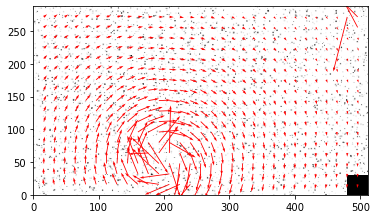

In [5]:
tools.display_vector_field('tmp.txt', scale=100, width=0.0025,on_img=True,image_name='1.tif')